# Part I - (Loan Data Exploration )
## by (Samah Alsulami)

## Introduction
> **Loan Data from Prosper:**
<br> Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than 23 billion in loans to more than 1,390,000 people.
<br> Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between 2,000 and 50,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

> Our goal is to explore a sample of Prosper's loan data, and This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others
  



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import imageio
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline


In [3]:
# Load the dataset 
df = pd.read_csv('prosperLoanData.csv')

In [251]:
pd.set_option ('display.max_columns', None)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [252]:
# Find the shape of our data
df.shape

(113937, 81)

In [253]:
# getting information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [254]:
# get overall statistics about the dataset
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [19]:
# check for duplicate data
df.duplicated().sum()

0

In [255]:
# check missing values
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### Data Cleaning

In [4]:
# Convert all date vlaues to datetime datatype
df["ListingCreationDate"] = df["ListingCreationDate"].astype('datetime64')
df["ClosedDate"] = df["ClosedDate"].astype('datetime64')
df["LoanOriginationDate"] = df["LoanOriginationDate"].astype('datetime64')


In [5]:
# convert Occupation, LoanStatus, and EmploymentStatus into ordered categorical types
df['Occupation'] = df['Occupation'].astype('category')
df['LoanStatus'] = df['LoanStatus'].astype('category')
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  category      
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [6]:
# Rename columns
df = df.rename(columns = {'ProsperRating (numeric)': 'ProsperRating_num','ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating', 'TradesNeverDelinquent (percentage)': 'TradesNeverDelinquent'})

In [7]:
# Based on the dictionary, store all the numeric categories and their titles 
category_list = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
df.ListingCategory = df.ListingCategory.map(category_list)

# Show results
df.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [8]:
# convert ProsperRating into ordered categorical types
ordinal_var_dict = {'ProsperRating': ['N/A','HR','E','D','C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

### What is/are the main feature(s) of interest in your dataset?

> I am interested to know: 
> - Is there a correlation between the `interest rate` and the `Prosper Score`?
> - Does The `loan statues` depending on the `employment Status` of the borrower?
> - What are the factors affecting the `interest rate`?
> - Is there a correlation between the `income range` and the `Prosper Score`?
> - Does the loan and its amount differ according to the `category list`?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> To achieve our exploration goals, we will deal with the following features:
> - **BorrowerRate:** The Borrower's interest rate for this loan. 
> - **BorrowerAPR:** The Borrower's Annual Percentage Rate (APR) for the loan.
> - **LoanStatus:** The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
> - **ProsperScore:** A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
> - **ProsperRating (Alpha):** The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
> - **IncomeRange:** The income range of the borrower at the time the listing was created.
> - **EmploymentStatus:** The employment status of the borrower at the time they posted the listing.
> - **LoanOriginalAmount:** The origination amount of the loan.
> - **Term:** The length of the loan expressed in months.

## Univariate Exploration

### Q1: What is the Distribution of the interest rate. 

### Visualization

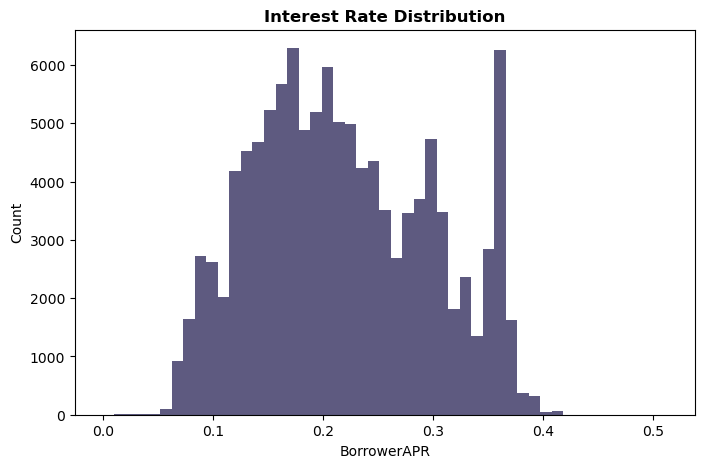

In [261]:
# start with a standard-scaled plot
bins = np.linspace(0, df['BorrowerAPR'].max(), 50)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'BorrowerAPR', bins = bins, color= '#5E5A80')

# putting title to the Visualization
plt.title('Interest Rate Distribution', weight="bold")
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.show()

### Observations
> the borrower's interest rate follows a multi-modal distribution. There are peaks in the interest rate, most of which range between 0.1 and 0.2. But there is a peak centered between 0.34 and 0.36.
We also note that loans with an interest rate greater than 0.44 are few.

### Q2: What is the Loan Amount Distribution?

### Visualization

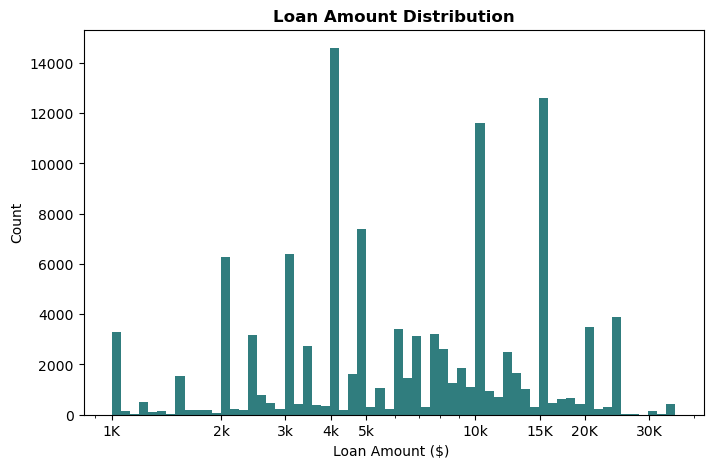

In [262]:
# To preview the distribution of the Loan Original Amount
binsiz= 0.025
bins_1 = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+binsiz, binsiz)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'LoanOriginalAmount', bins = bins_1, color = '#307D7E')
plt.xscale('log')
plt.xticks([1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 30000],
           ['1K', '2k', '3k', '4k', '5k', '10k', '15K', '20K', '30K'])

# putting title to the Visualization
plt.title('Loan Amount Distribution', weight="bold")
plt.xlabel('Loan Amount ($) ')
plt.ylabel('Count')
plt.show()

### Observations
> It shows us there peaks are the highest at 4k, 10k and 15k. They seem to be the most requested amounts in loans.

### Q3: What is the Frequency of the Borrower State ?

In [263]:
df['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

### Visualization

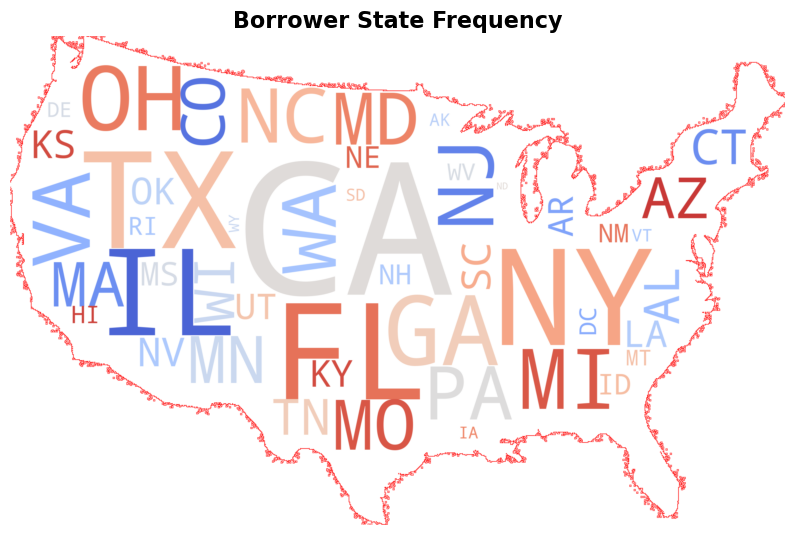

In [264]:
# Borrower State frequency
data = df['BorrowerState'].str.cat(others=None, sep=' ')

# Read an image to use for mask
img = imageio.v2.imread('usa_map copy.jpg')

# Word Cloud Instantiate
wordcloud = WordCloud(colormap= 'coolwarm',
               max_words=150,
               background_color='white',
               scale=3,
               mask=img,
               stopwords=STOPWORDS,
               contour_color='red',
              contour_width= 1).generate(data)

#Use matplotlib to display the fitted wordcloud
plt.figure(figsize = [10, 8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Borrower State Frequency', fontsize=16, weight="bold")
plt.axis('off');

### Observations
> The distribution shows the states that have the biggest numbers of loans, which are:
> - **CA:** California
> - **TX:** Texas
> - **NY:** New York
> - **FL:** Florida   

### Q4: What is the Prosper's Borrowers Risk ?

### Visualization

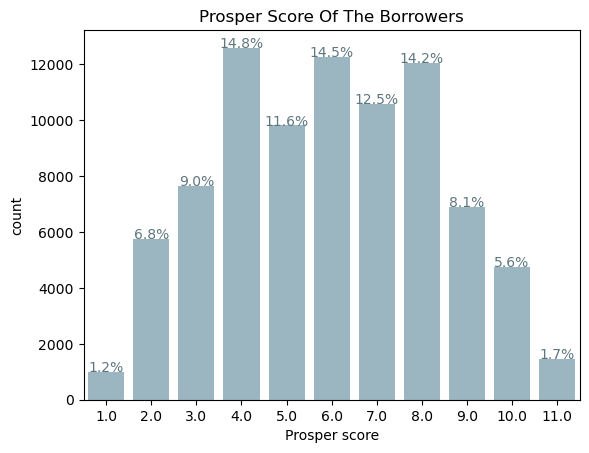

In [279]:
sb.countplot(data=df, x='ProsperScore', color='#95B7C7');

plt.title('Prosper Score Of The Borrowers')
plt.xlabel('Prosper score');
locs, labels = plt.xticks()

# get the text property 
risk_counts = df['ProsperScore'].value_counts()
df_1 = df['ProsperScore'].value_counts().sum()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = risk_counts[float(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/df_1)
    
    plt.text(loc, count+2, pct_string, ha = 'center', color = '#5E767E')

### Observations
> The figure above shows the Prosper score distribution of borrowers.
It appears as a normal distribution, spiking on Score 4, 6, and 8.  

### Q5: What is the Ordinal Variable's Distribution ?
> `ProsperRating`, `EmploymentStatus` and `ListingCategory`

### Visualization

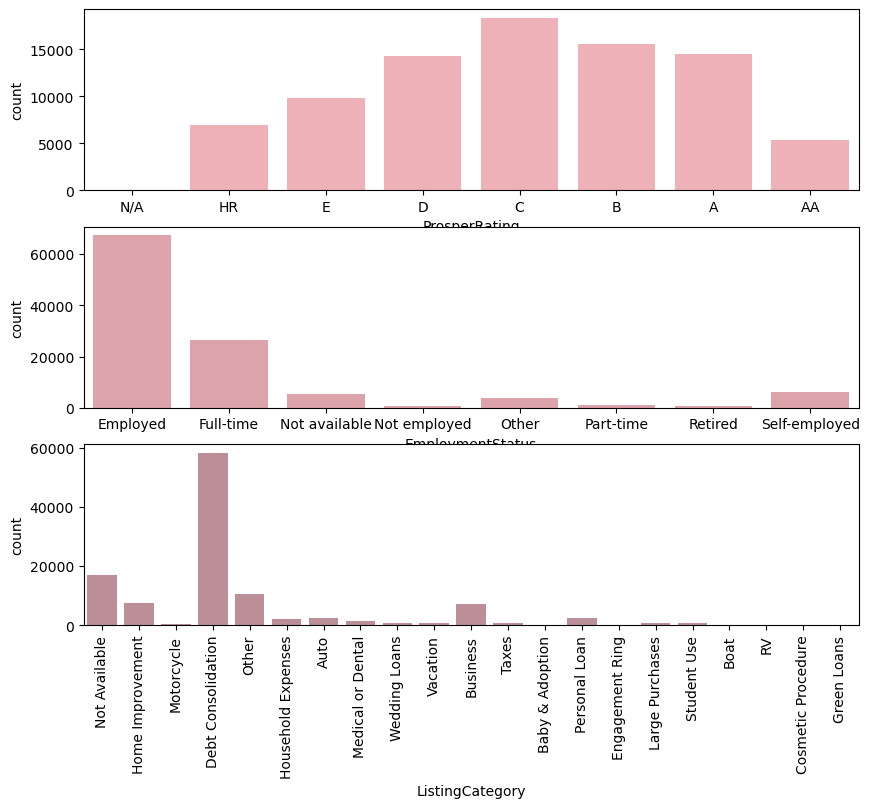

In [266]:
# Distribution of ProsperRating, EmploymentStatus and ListingCategory
fig, ax = plt.subplots(nrows=3, figsize = [10,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperRating', color = '#F9A7B0', ax = ax[0])
sb.countplot(data = df, x = 'EmploymentStatus', color = '#E799A3', ax = ax[1])
sb.countplot(data = df, x = 'ListingCategory', color = '#C48793', ax = ax[2])

plt.xticks(rotation=90)
plt.show()

### Observations
> - We can see that the distribution of Prosper rate is unimodal distribution, with the most common rating centered in the middle represented by grade C. 
> - The employment status distribution shows us that the majority of borrowers are employed. This is an expected result, because it is not easy to get a loan without job.
> - Debt consolidation is the most common type on the list of reasons people take out loans, surpassing other reasons such as business, home improvements, and medical reasons.

### Q6: What is the Distribution of the Loan Status ?

### Visualization

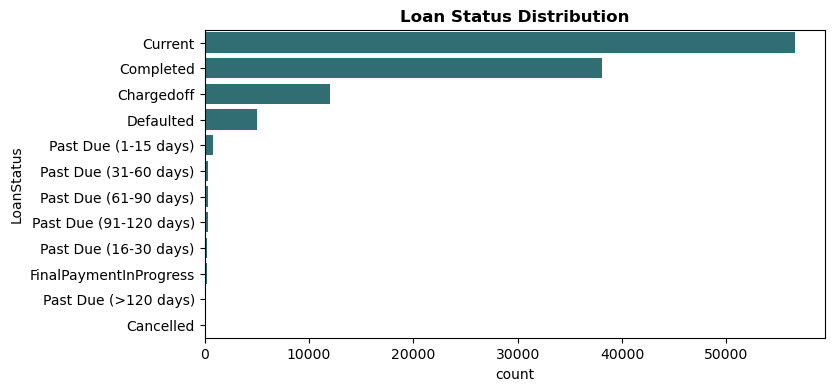

In [267]:
status_counts = df['LoanStatus'].value_counts()
# To get the decreasing order of the frequency.
status_order = status_counts.index

plt.figure(figsize=(8, 4))
plt.title('Loan Status Distribution', weight="bold")

sb.countplot(data=df, y='LoanStatus', color='#25787E', order= status_order );

### Observations
> The distribution result shows that the majority of loans are current.
  And because the number of loans in the dataset is huge, the number of completed loans were approximately 38,000, and chargedoff loans were about 11,000 loans

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> When performing the visualization of the distribution of the `loan original amount`, we found that the variable takes a large range of values, so we had to use Log Transform so that the data is clearly distributed. After the transformation 3 peaks of numbers appeared in the distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Mostly I order the data to make the visualization easier to read.
> And I did not notice any unusual distributions in my analysis.

## Bivariate Exploration

### Q1: Is there any correlation between numeric Variables ? 

### Visualization

In [9]:
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate','CurrentCreditLines', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment',
                    'ProsperScore']

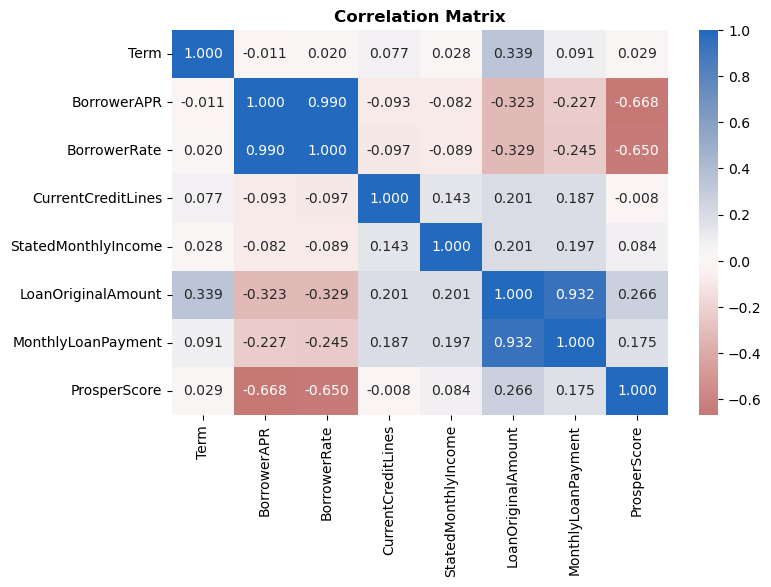

In [269]:
# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix', weight= 'bold'); 

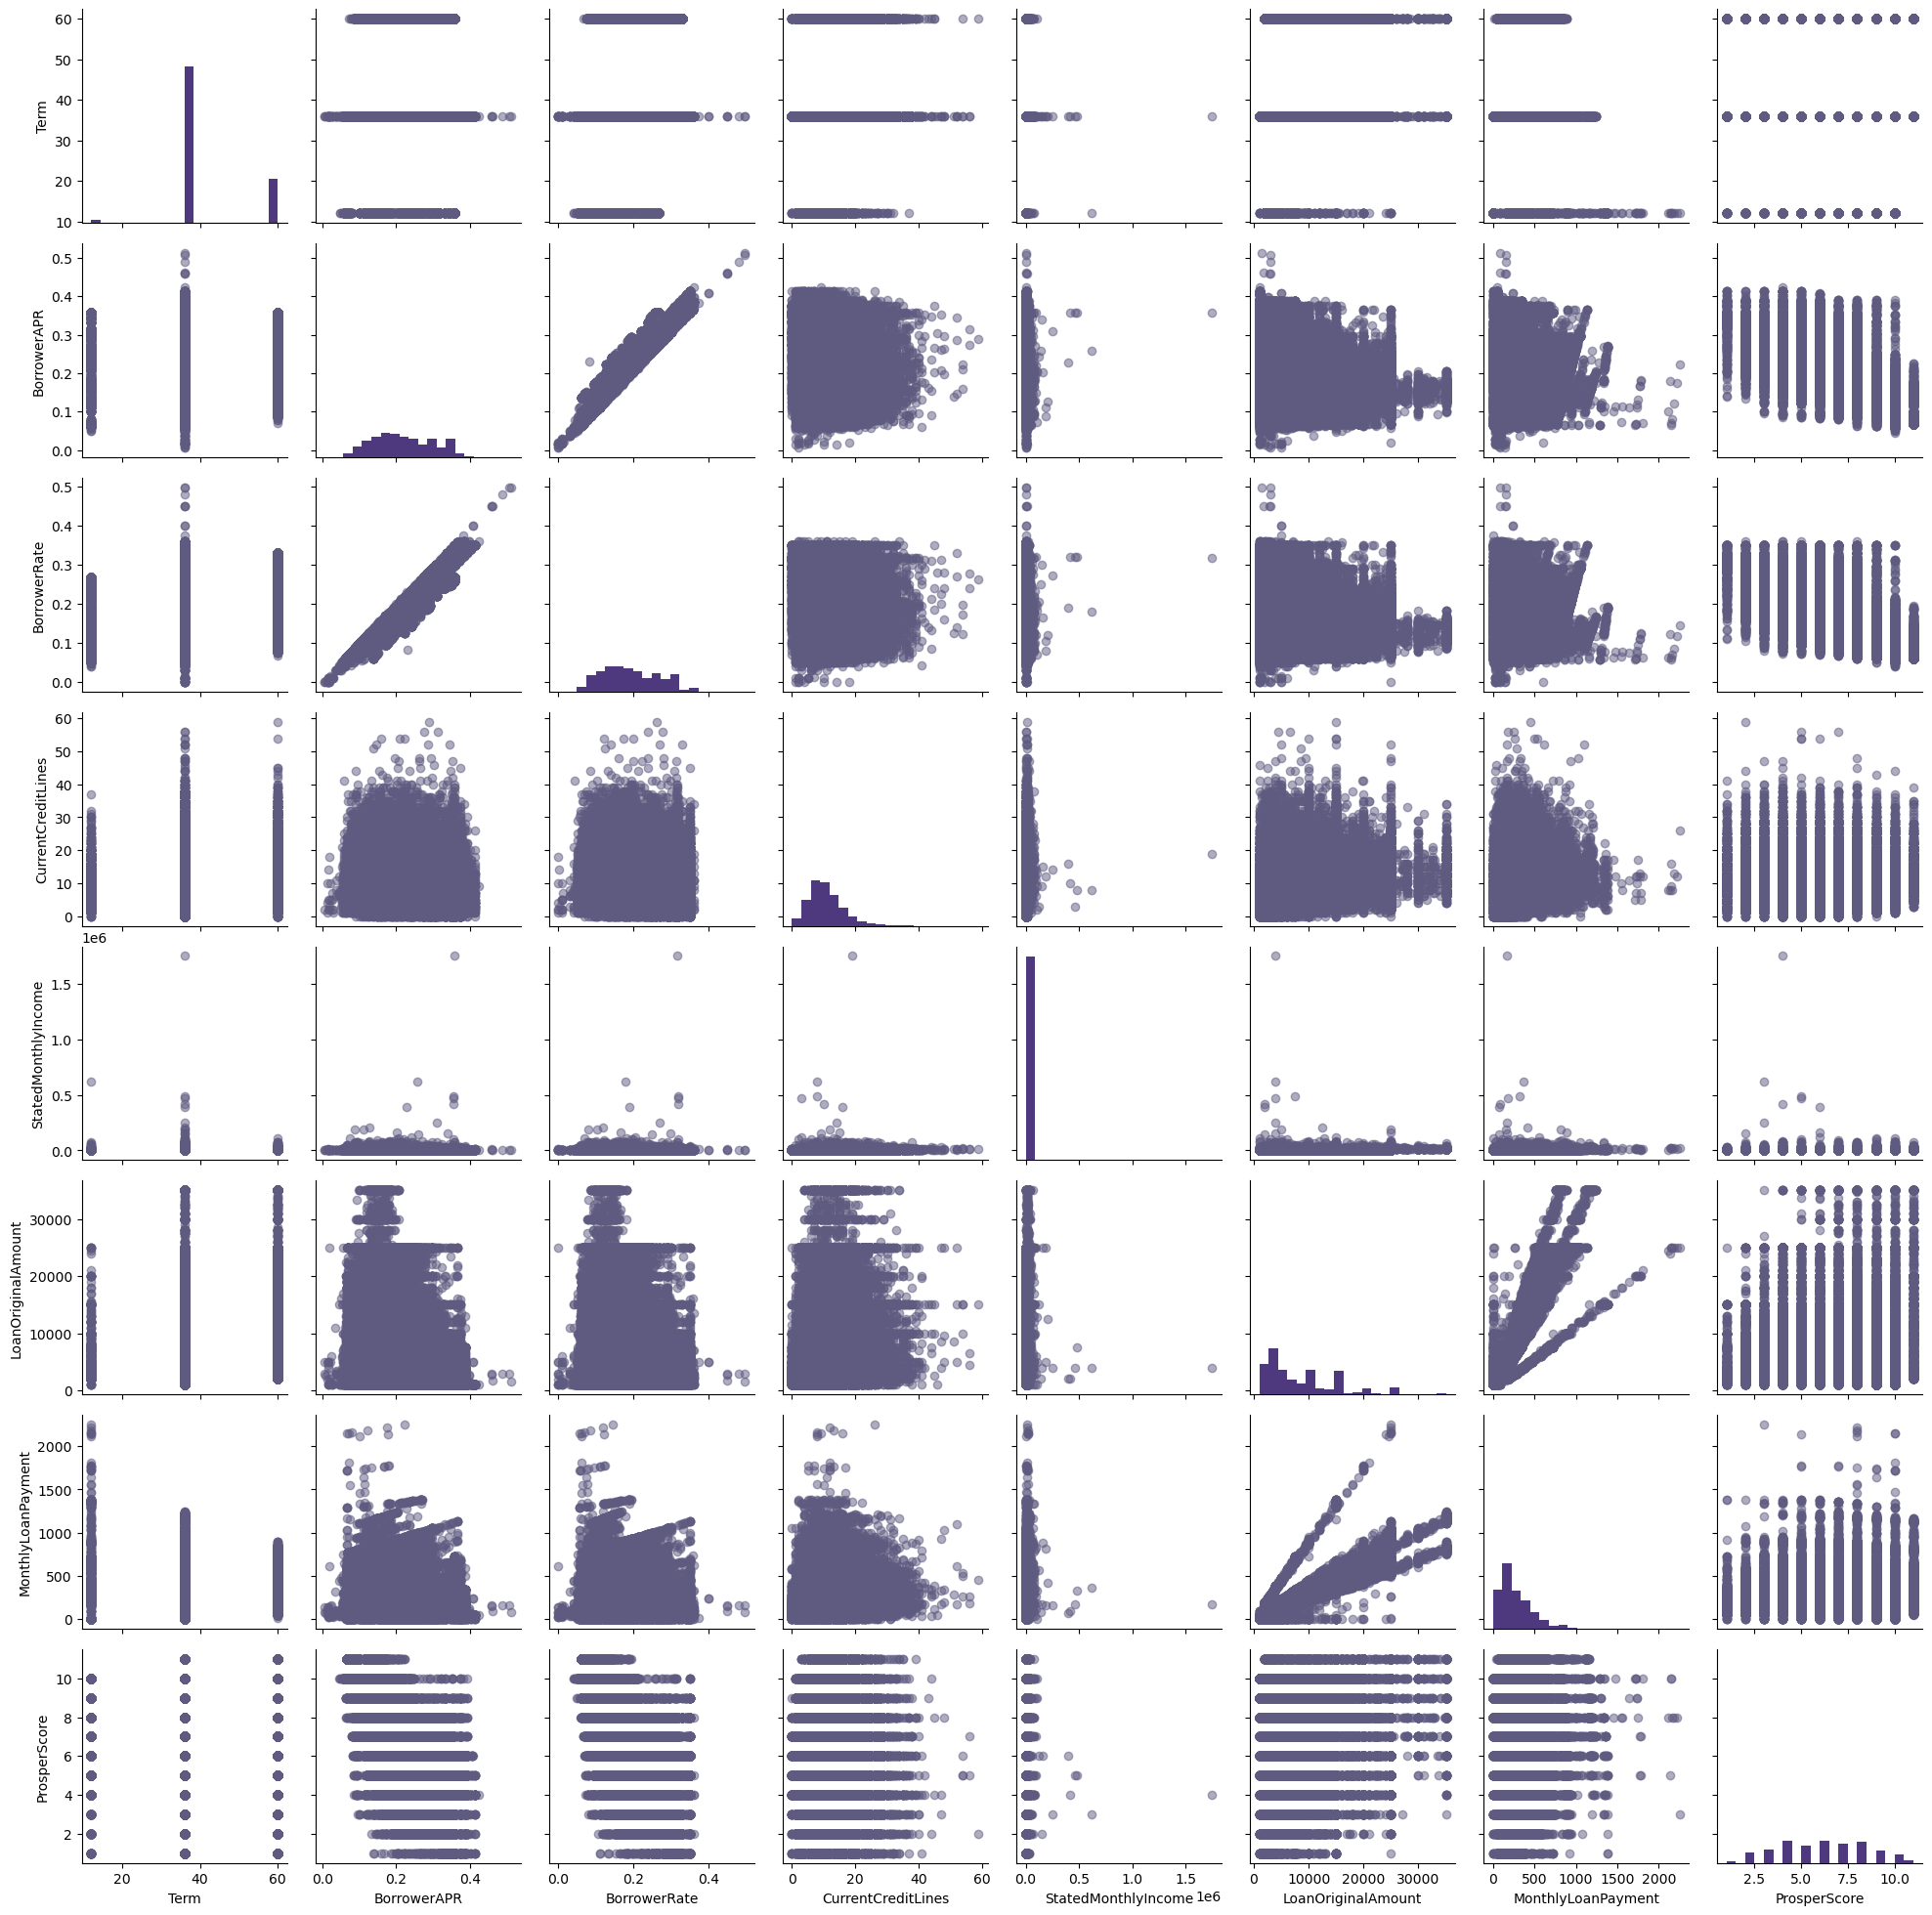

In [10]:
# take a sample of 2500 records, to view the relationship better. 
df_samp = df.sample(n=2500, replace = False)

# Create a scatterplot of each numeric variable against the other
g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20, color= '#4E387E');
g.map_offdiag(plt.scatter, color= '#5E5A80', alpha = 1/2);

### Observations
> - There is a strong correlation between the interest rate and the borrowerRate.
> - Strong correlation between the loan term and the loan amount.
> - Negative correlation between the interest rate and the loan amount.
> - Negative correlation between the interest rate and the Porsper Score.

### Q2: Relation Between BorrowerAPR And ProsperScore

### Visualization

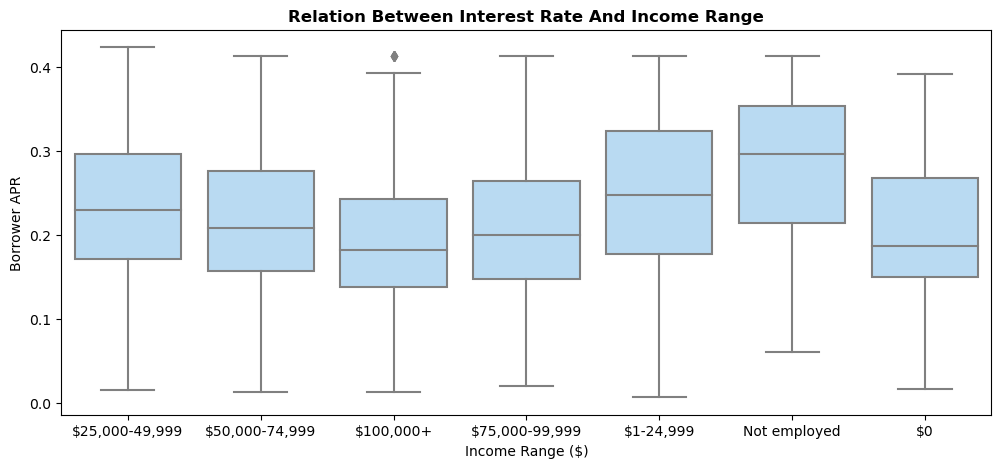

In [271]:
# Borrower APR vs Income Range 
df_new = df.query('IncomeRange != "Not displayed"')

plt.figure(figsize = [12, 5])
sb.boxplot(data=df_new, y= 'BorrowerAPR', x= 'IncomeRange' ,color= '#AFDCFC')
plt.title('Relation Between Interest Rate And Income Range', weight= 'bold')
plt.ylabel('Borrower APR')
plt.xlabel('Income Range ($)');

### Observations
> There is an inverse relationship between a borrower's interest rate and his income range, meaning that higher incomes enjoy a lower interest rate.

### Q3: Relation Between BorrowerAPR And Loan Original Amount

### Visualization

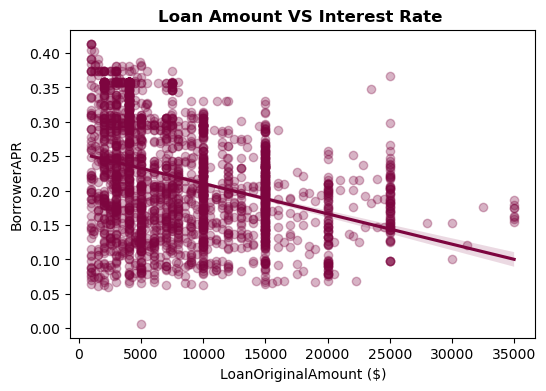

In [272]:
plt.figure(figsize = [6, 4])
sb.regplot(data = df_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR',
           color= '#7D053F',
           scatter_kws={'alpha':0.3})
plt.title('Loan Amount VS Interest Rate ', weight= 'bold')
plt.xlabel('LoanOriginalAmount ($)');

### Observations
> The figure shows a negative correlation between the loan amount and the interest rate.
The higher the loan amount, the lower the interest rate

### Q4: Correlation Between BorrowerAPR And  Categorical Features 

### Visualization

<Figure size 1200x800 with 0 Axes>

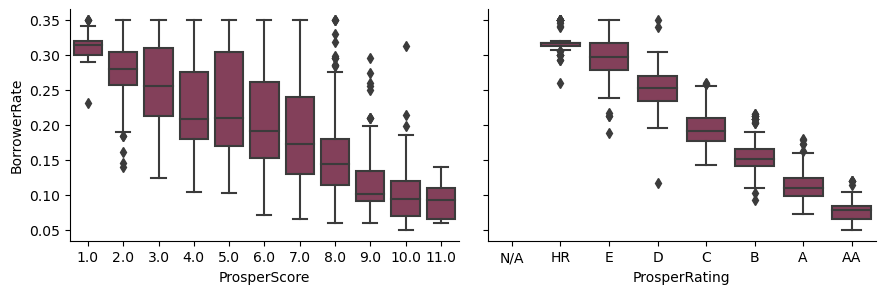

In [273]:
# Define boxgrid function
def boxgrid(x, y, **kwargs):
    sb.boxplot(x=x, y=y, color="#8E3557")

plt.figure(figsize = [12, 8])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = ['ProsperScore', 'ProsperRating'],
                height = 3, aspect = 1.5)
g.map(boxgrid);

### Observations
> The analysis here shows us that the PorsperScore has an important role in determining the interest rate. 
> This means that if the borrower has a high Prosper rating (AA), the interest rate will be lower, and if the Prosper rating is low (HR), the interest rate will be high.

### Q5: What is the association between Employment status and Loan amount and Interest Rate ?

### Visualization

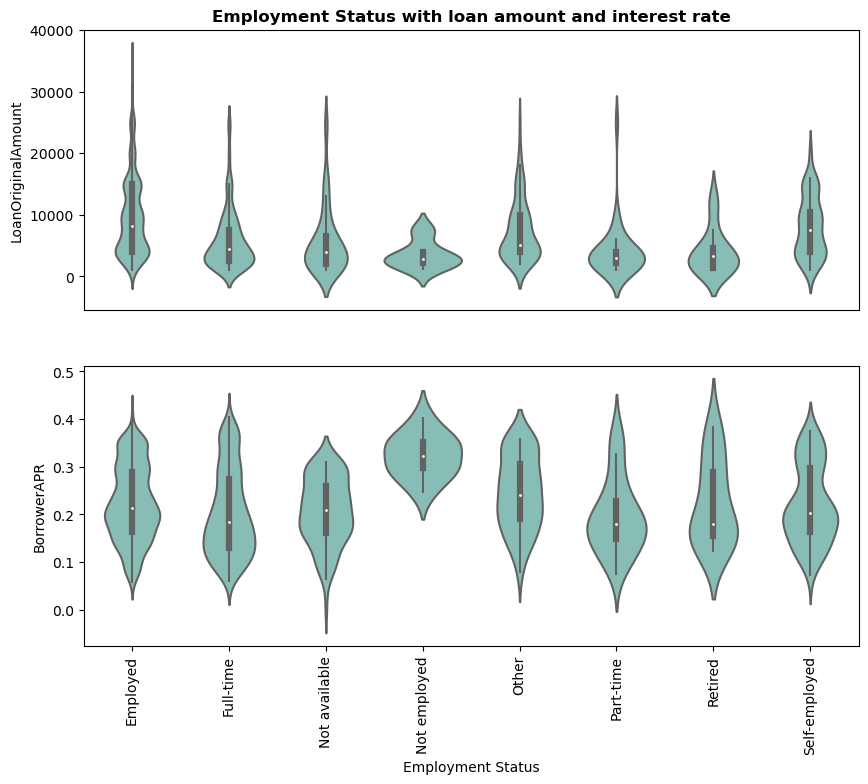

In [274]:
plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)
sb.violinplot(data=df_samp, x='EmploymentStatus', y='LoanOriginalAmount',color="#7FC6BC")
plt.xticks(rotation=90);
plt.title('Employment Status with loan amount and interest rate', weight= 'bold')
plt.xlabel('Employment Status')

# Remove violinplot ticks
plt.xticks([])
plt.xlabel('')



plt.subplot(2,1,2)
sb.violinplot(data=df_samp, x='EmploymentStatus', y='BorrowerAPR',color="#7FC6BC")
plt.xticks(rotation=90);


plt.xlabel('Employment Status')
plt.ylabel('BorrowerAPR');

### Observations
> As expected, the interest rate is determined by the Employment status of the borrower, because the employee gets a monthly income that enables him to obtain a high loan amount, and thus the interest rate decreases.
Unlike non-employees, we see that they have a high interest rate because their loan amounts are low

### Q6: Does Income Range Correlate with Prosper Score ?

### Visualization

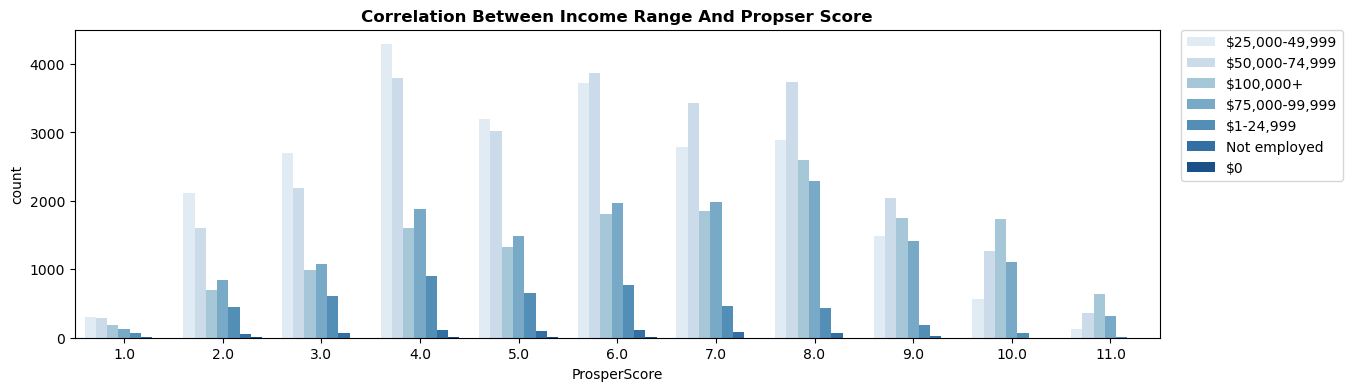

In [280]:
# IncomeRange VS ProsperScore
plt.figure(figsize = [14, 4])
sb.countplot(data = df_new, x = 'ProsperScore', hue = 'IncomeRange', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Correlation Between Income Range And Propser Score', weight= 'bold')
plt.show();

### Observations
> It shows us that there is a direct relationship between the Prosper Score and the income range of the borrower.
> And These two variables have an impact on the Prosper rating

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, I have expanded my exploration of the interest rate relationship with some variables, and have concluded:
> - The interest rate is lower for people with higher incomes, because they often get a higher loan amount.
> - There is a negative correlation between the interest rate and the loan amount. The lower the loan amount, the higher the interest rate.
> - The higher the prosper rating, the higher the risk score, and the lower the interest rate.
> - The loan amount is related to the employment status of the borrower, borrowers who do not have a job get a low loan amount mostly.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It seems that there is a positive correlation between the Stated Monthly Income and the Loan Amount. We conclude that the greater the monthly income, the higher the loan amounts.

## Multivariate Exploration

### Q1: What is the nature of the relationship between Loan original amount and Interest rate and Prosper score ?

### Visualization

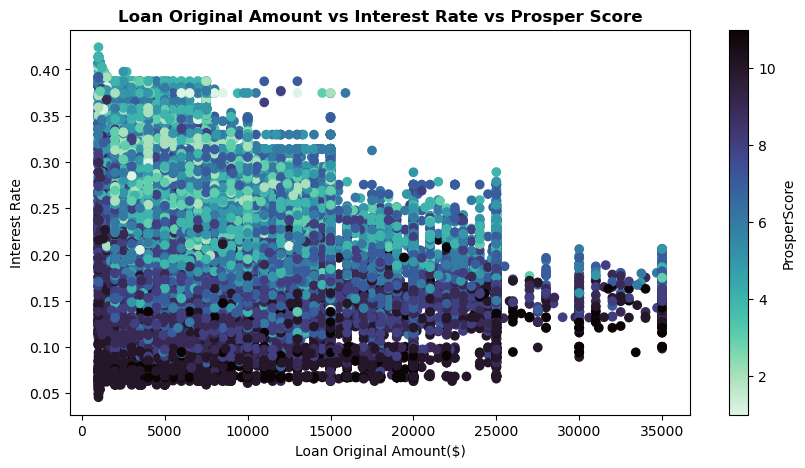

In [11]:
# LoanOriginalAmount vs Borrower APR  vs ProsperScore
plt.figure(figsize = [10, 5])

plt.scatter(data= df, x='LoanOriginalAmount', y= 'BorrowerAPR', c='ProsperScore', cmap = 'mako_r')
plt.colorbar(label = 'ProsperScore');

plt.title('Loan Original Amount vs Interest Rate vs Prosper Score',weight= 'bold')
plt.xlabel('Loan Original Amount($)')
plt.ylabel('Interest Rate');

### Observations
> The relationship between the variables seems clear.
Borrowers with low loan original amount take higher interest rate then higher risk score

### Q2: What is the relationship between Prosper Rating and Loan original amount and Loan Term ?

### Visualization

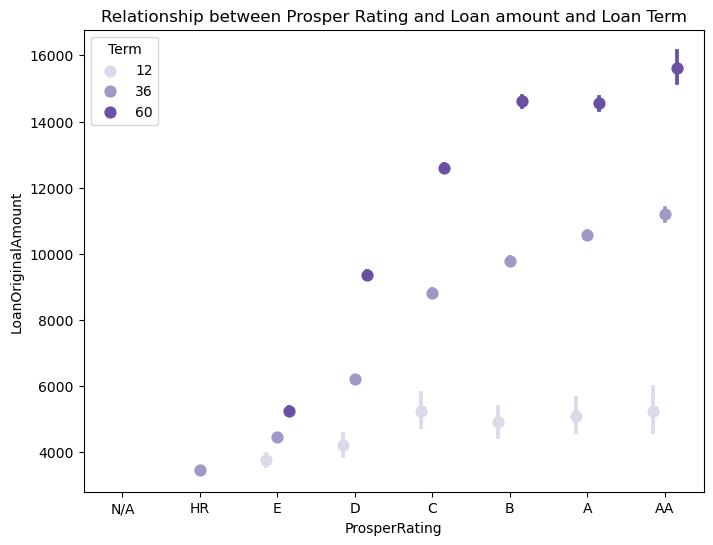

In [277]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
                   palette = 'Purples', dodge = 0.3, linestyles = "")
plt.title('Relationship between Prosper Rating and Loan amount and Loan Term');


### Observations
> We see that there is an interaction between the term of the loan and the Prosper rate. People with a high Prosper rate often get a high loan amount and thus an increase in the loan term.

### Q3: Does the term of the loan affect the relationship of the  loan amount with the interest rate?

### Visualization

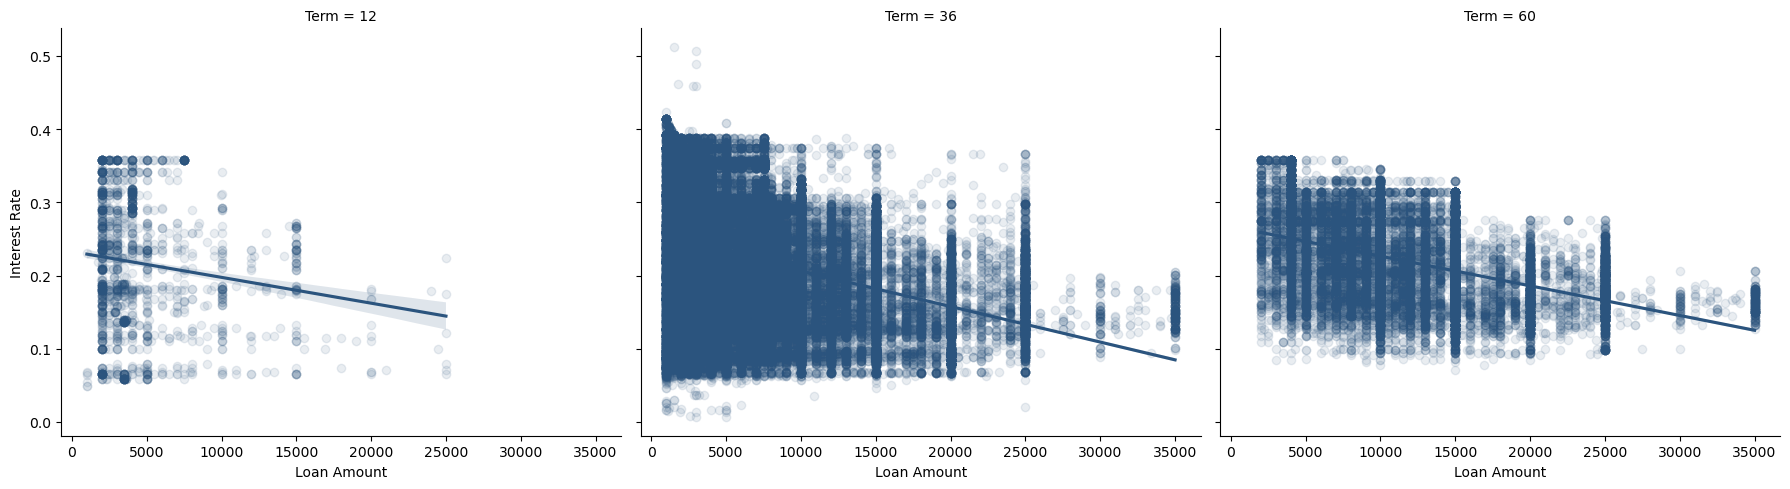

In [278]:
# Term effect on relationship of interest rate and loan amount
g = sb.FacetGrid(data = df, col = 'Term', aspect=1.2, height=5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws= {'alpha': 0.1}, color= '#2B547E');
g.set_xlabels('Loan Amount')
g.set_ylabels('Interest Rate');

### Observations
> It appears that the term of the loan does not affect the relationship between the loan amount and the interest rate, and the negative correlation still exists between them

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this Multivariate exploration, I expanded my exploration to search for the effect of the loan term on some variables.
It became clear to me that there is an almost positive correlation between the loan term and the prosperity rating. When the prosper rating goes up, the loan amount increases, and with an increase in the loan amount, the loan term also becomes higher.
> The term of the loan does not affect the interest rate.

### Were there any interesting or surprising interactions between features?

> I created a scatterplot to determine the type of correlation between the Posper score and the interest rate,
The correlation was negative, as the higher the Prosper score meaning lower the risk, and thus the lower the interest rate.

## Conclusions
> This exploration aims to obtain a clear picture of the status of loans and the factors affecting them, and to understand the motives of borrowers.
<br> Regarding the factors affecting loans, we found a negative correlation between interest rate, prosper rating, and loan amount. Prosper rating plays an important role in determining the interest rate, as it is affected by the borrower's employment status and loan amount, and has a positive correlation with them.
<br> As for understanding the motives of the borrowers, the result was surprising. We found that most of the borrowers ask for the loan in order to Debt consolidation!!

> In this data, the variables interact and correlation to each other. A change in one of the variables may have an effect on more than one variable.
